# Package Install

In [2]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [3]:
if (!require(ggplot2)) install.packages(ggplot2)
library (ggplot2)

Loading required package: ggplot2



In [4]:
set.seed(0)

# 2. preferential attachment model

## 2.a
    Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 1 old nodes. Is such a network always connected?

In [5]:

print_info = function(g){
    print(paste("is connected: ", is.connected(g), "vcount: ", vcount(g), "ecount: ", ecount(g), sep= "  "), quote= FALSE)
}

In [6]:
n = 1000
m_val = 2
g_pa_1k <- sample_pa(n, m=m_val, directed=F)

[1] is connected:   TRUE  vcount:   1000  ecount:   1997


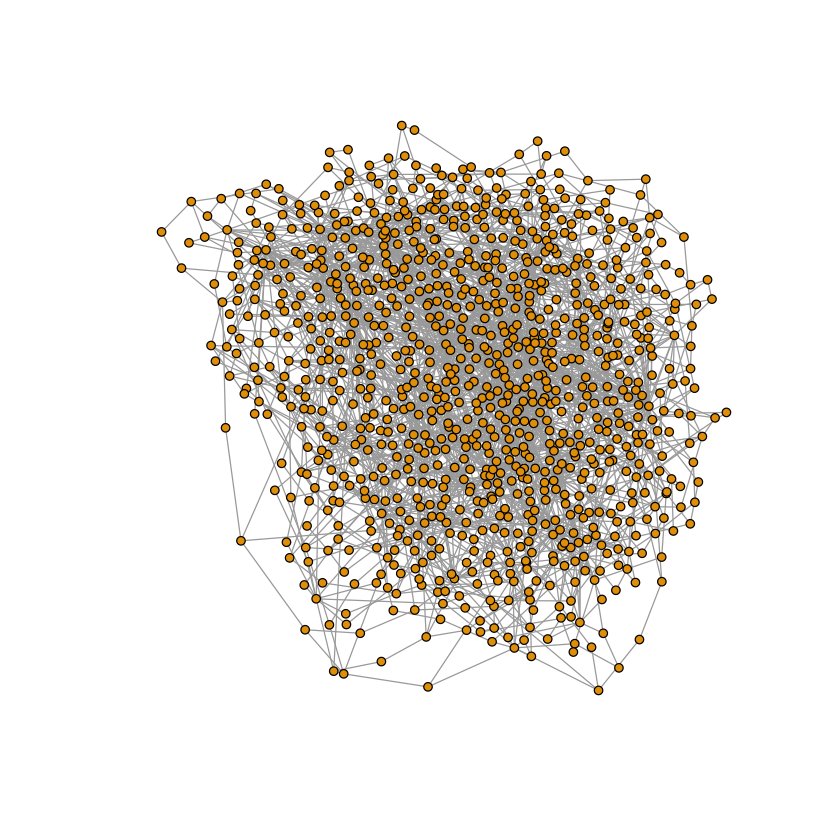

In [7]:
plot(g_pa_1k, vertex.size=3, vertex.label=NA)
print_info(g_pa_1k)

## 2.b
    Use fast greedy method to find the community structure. Measure modularity.

In [8]:
get_modularity = function(graph){
    cluster_fg <- cluster_fast_greedy(graph, modularity = TRUE)
    plot(cluster_fg, graph, layout = layout.fruchterman.reingold(graph), 
         edge.arrow.size=.1, vertex.size=3, vertex.label=NA, main=paste(" Cluster graph" ))
    
    return (modularity(cluster_fg))
}

[1] 0.5226493

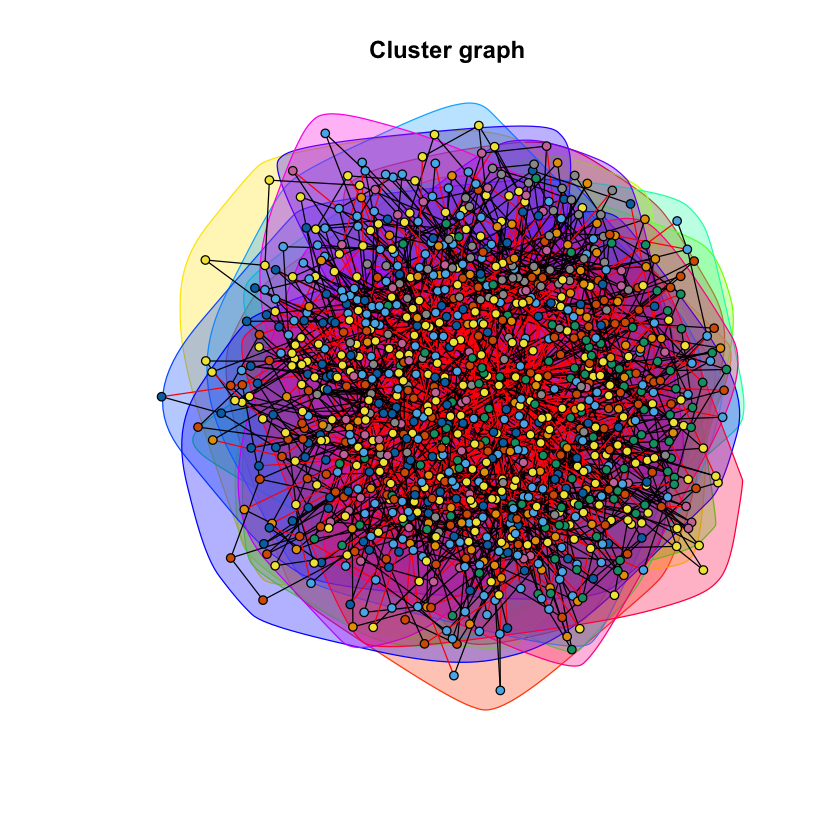

In [9]:
get_modularity(g_pa_1k)

## 2.c
    Try to generate a larger network with 10000 nodes using the same model. Compute modularity. How is it compared to the smaller network’s modularity?


[1] 0.5345329

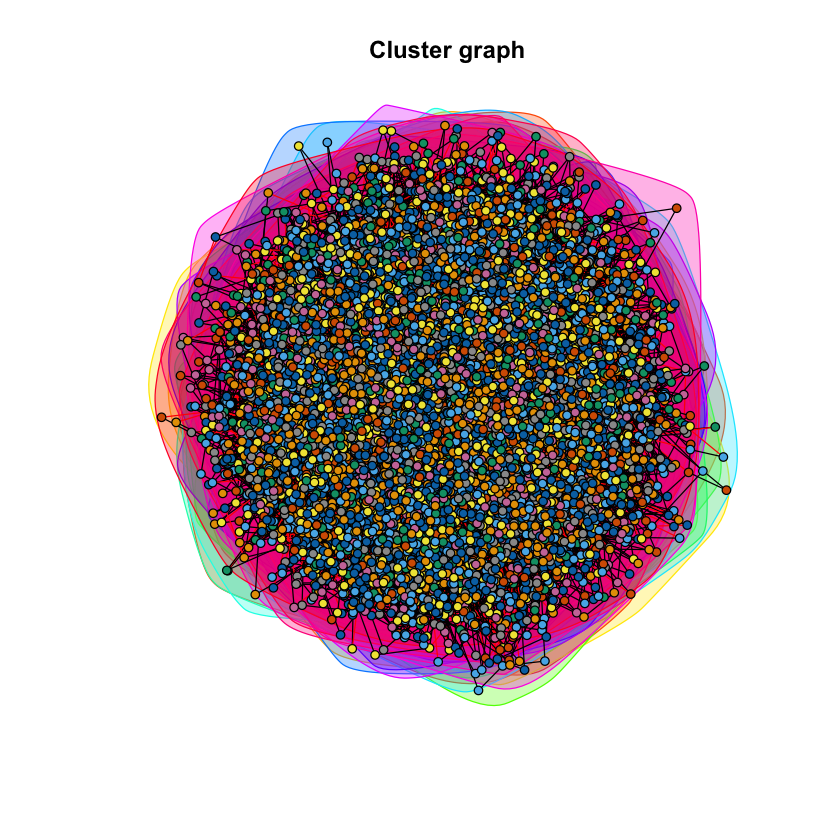

In [10]:
n = 10000
g_pa_10k = sample_pa(n, m=m_val, directed=F)
get_modularity(g_pa_10k)

[1] is connected:   TRUE  vcount:   10000  ecount:   19997


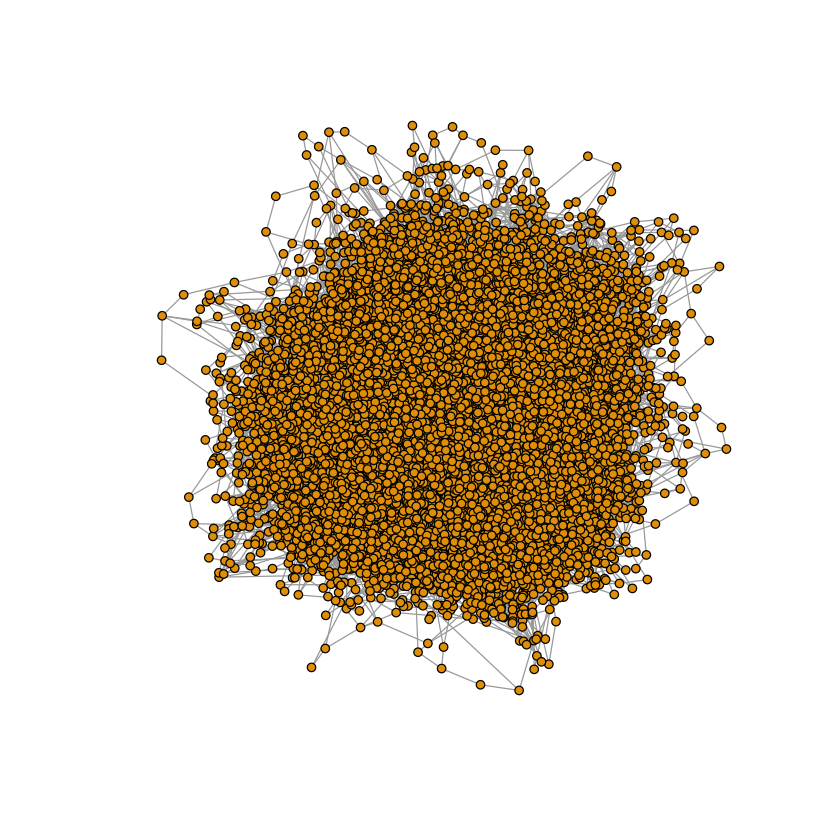

In [11]:
# plot to see what it looks like
plot(g_pa_10k, vertex.size=3, vertex.label=NA)
print_info(g_pa_10k)

## 2.d
    Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate the slope of the plot using linear regression

In [12]:
create_degree_dist_df = function(degree_list){
    df <- data.frame(Reduce(rbind, degree_list))
    colnames(df) <- c( "freq")
    
    degree = seq(1,length(degree_list))
    df_deg_dist <- cbind(df, degree)
    
    return (df_deg_dist)

}

plot_degree_dist = function (deg_dist){
    plot(deg_dist,main="Degree Distribution",xlab="Degree",ylab="Density")
    
}



#### n=10k 

In [13]:
# get the degree distribution of the graph
degree_dist_10k = degree.distribution(g_pa_10k)

# create a dataframe for the linear regression
degree_dist_df_10k = create_degree_dist_df(degree_dist_10k)


In [14]:
df_nonzero_10k = degree_dist_df_10k[degree_dist_df_10k$freq>0,]
lm(log(freq)~log(degree), df_nonzero_10k)



Call:
lm(formula = log(freq) ~ log(degree), data = df_nonzero_10k)

Coefficients:
(Intercept)  log(degree)  
      1.042       -2.474  


In [46]:
df_lm_10k = df_nonzero_10k[df_nonzero_10k$degree<20,]

lm(log(freq)~log(degree), df_lm_10k)



Call:
lm(formula = log(freq) ~ log(degree), data = df_lm_10k)

Coefficients:
(Intercept)  log(degree)  
      2.596       -2.993  


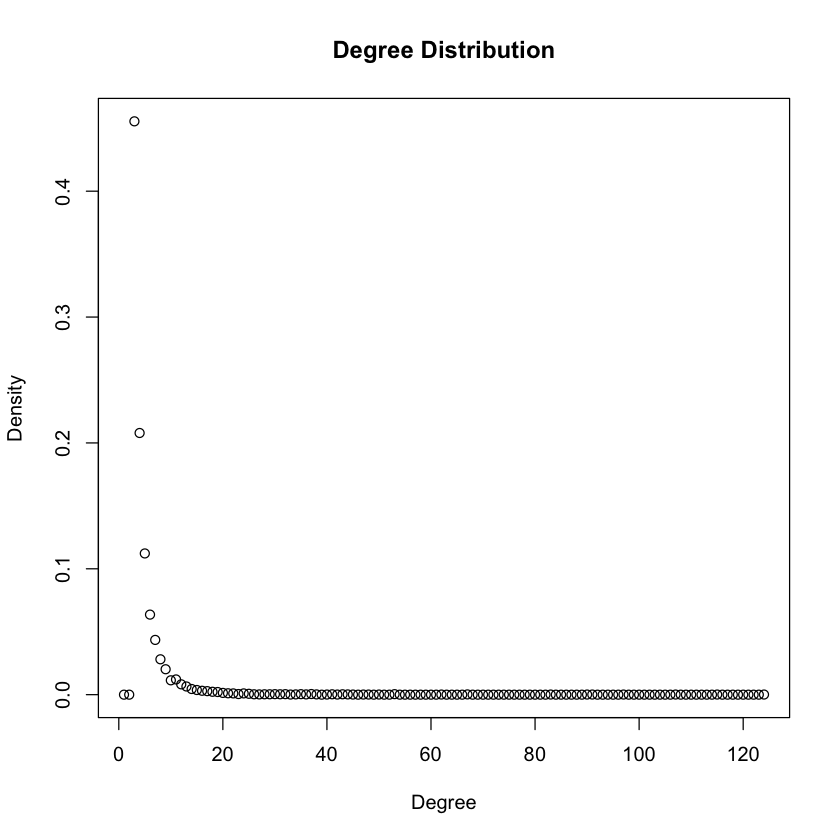

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"log" is not a graphical parameter”


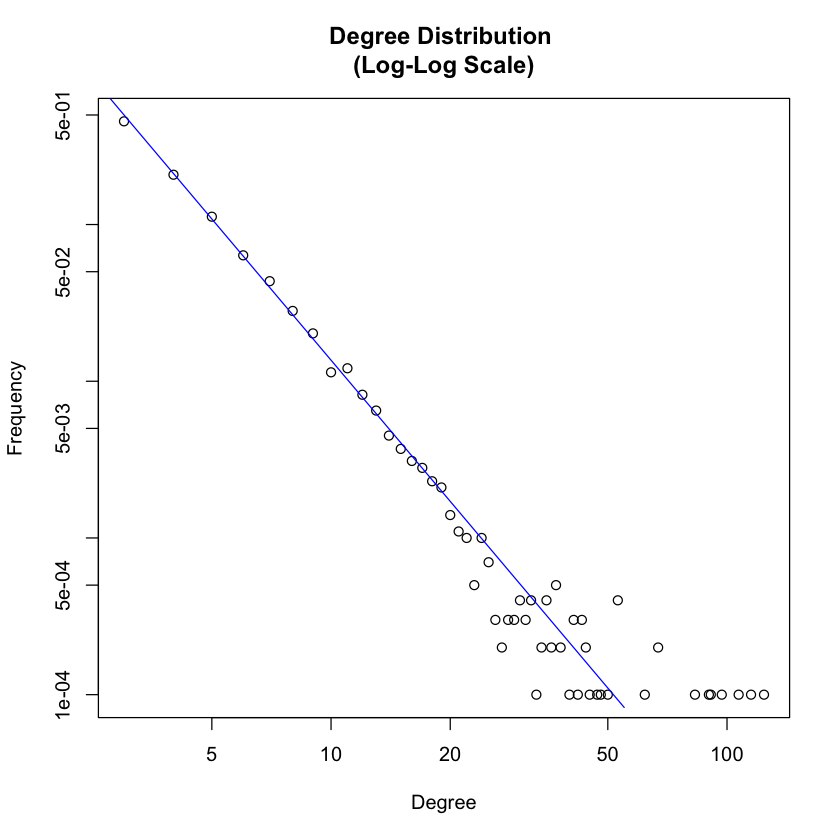

In [47]:

# plot the degree distribution and the log-log scale of the degree distribution (w/linear line)
plot_degree_dist(degree_dist_10k)

x <- seq(1, length(df_nonzero_10k$degree))
plot(df_nonzero_10k$degree, df_nonzero_10k$freq ,  main="Degree Distribution \n(Log-Log Scale)",
     xlab="Degree",ylab="Frequency" , log='xy')

    lines(x, exp(2.596)*x^(-2.993 ), log='xy', col="blue")



#### n= 1000

In [16]:
# get the degree distribution of the graph
degree_dist_1k = degree.distribution(g_pa_1k)

# create a dataframe for the linear regression
degree_dist_df_1k = create_degree_dist_df(degree_dist_1k)



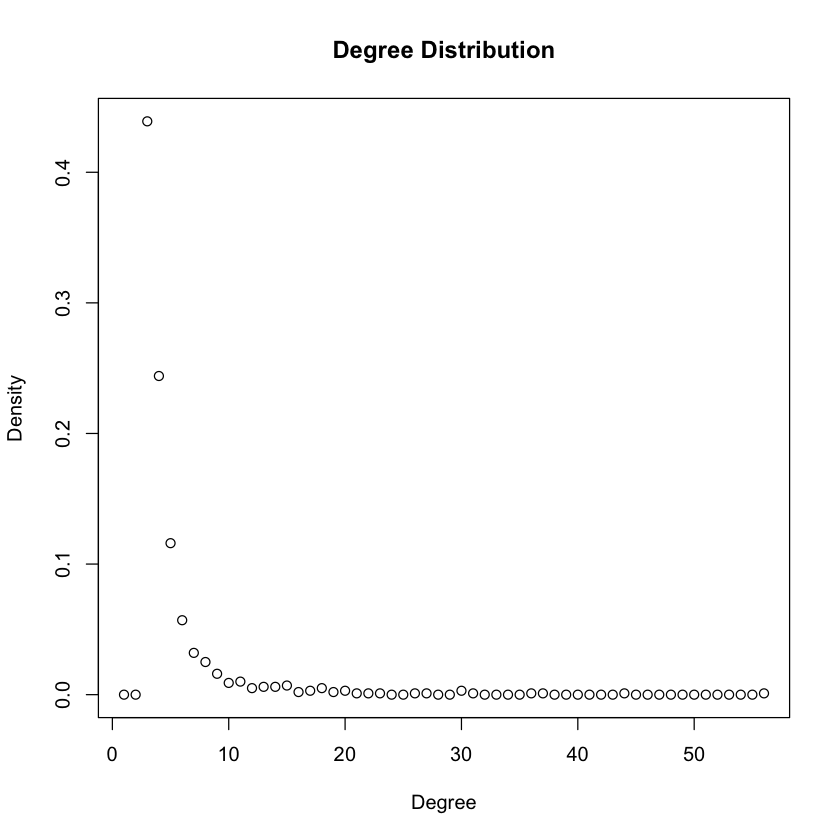

In [17]:
# plot the degree distribution and the log-log scale of the degree distribution (w/linear line)
plot_degree_dist(degree_dist_1k)



In [43]:
# LOG-LOG scale
df_nonzero_1k = degree_dist_df_1k[degree_dist_df_1k$freq>0,]
df_lm = degree_dist_df_1k[degree_dist_df_1k$freq>0.005,]

lm(log(freq)~log(degree), df_lm)



Call:
lm(formula = log(freq) ~ log(degree), data = df_lm)

Coefficients:
(Intercept)  log(degree)  
      2.319       -2.866  


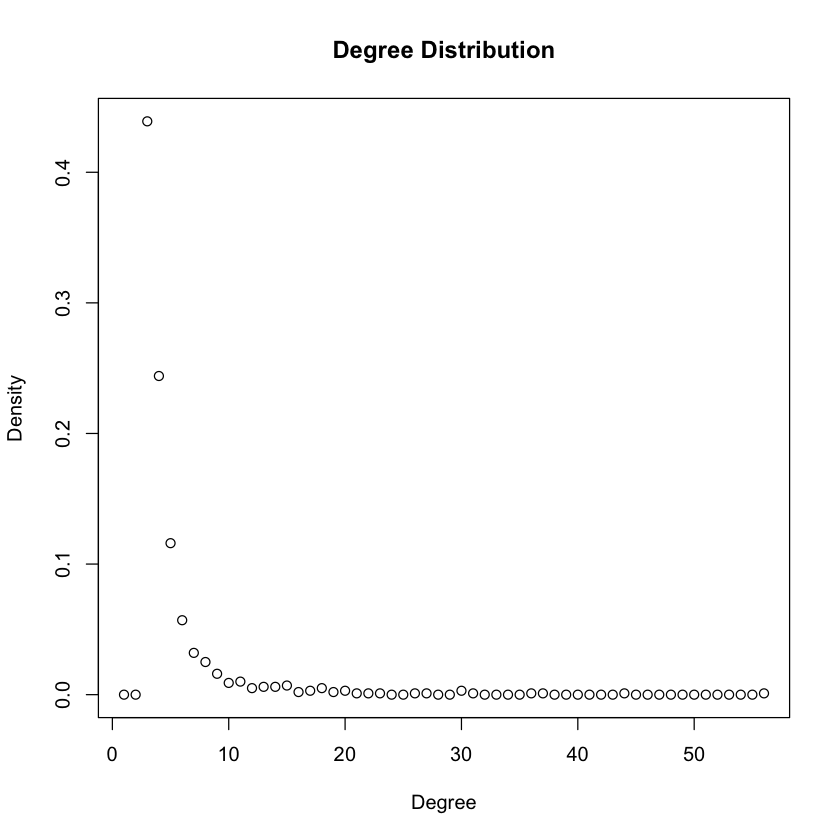

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"log" is not a graphical parameter”


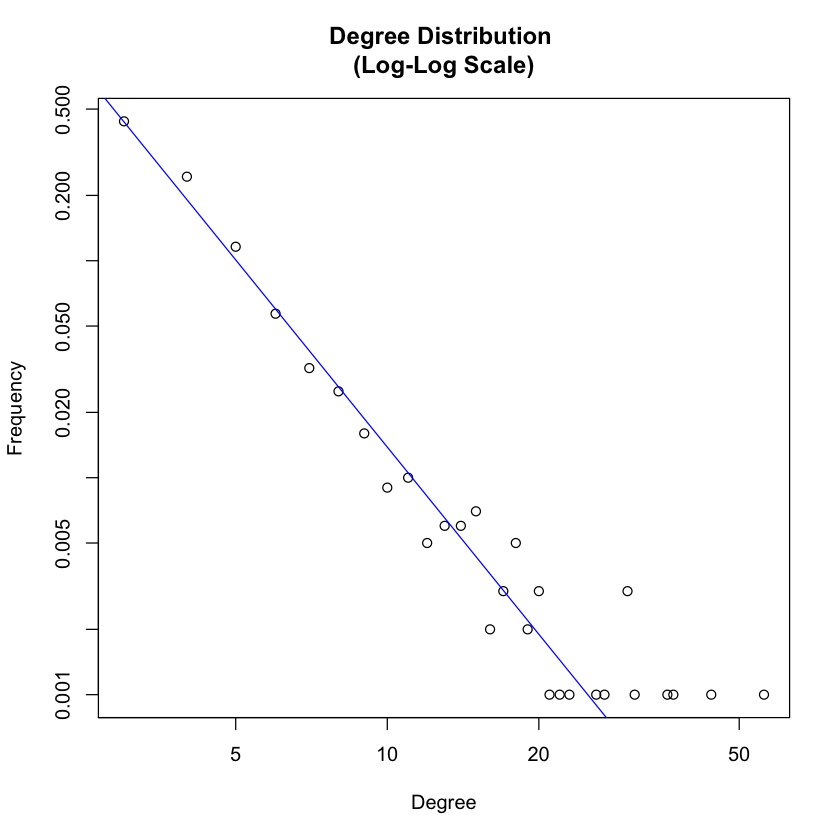

In [44]:

# plot the degree distribution and the log-log scale of the degree distribution (w/linear line)
plot_degree_dist(degree_dist_1k)

x <- seq(1, length(df_nonzero_1k$degree))
plot(df_nonzero_1k$degree, df_nonzero_1k$freq ,  main="Degree Distribution \n(Log-Log Scale)",
     xlab="Degree",ylab="Frequency" , log='xy')

    lines(x, exp(2.319)*x^(-2.866), log='xy', col="blue")



## 2.e
    In the two networks generated in 2(d), perform the following:
    Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?

In [20]:
get_neighbor_degree = function (g , node){
    i_neighbors <- neighbors(g, node)

    j <- sample(i_neighbors,1:length(i_neighbors), replace = FALSE)

    return (degree(g , v = j))

}

In [21]:
n=1000

i <- sample(1:n, n, replace = FALSE)
deg_list = c()
for( node in i ){
    degree = get_neighbor_degree(g_pa_1k, node)
    deg_list = c(deg_list , degree)
}

#sort the degree list
deg_list_sorted= sort(deg_list)
#create a dataframe with the frequencey of each degree
degree_df = as.data.frame(table(deg_list_sorted))

#create new degree distribution dataframe
degree_dist_new <- transform(degree_df, degree_distribution = Freq/n)
degree_dist_new <- transform(degree_dist_new, deg_list_sorted = as.numeric(deg_list_sorted))


In [22]:
lm(log(degree_distribution)~log(deg_list_sorted), degree_dist_new)


Call:
lm(formula = log(degree_distribution) ~ log(deg_list_sorted), 
    data = degree_dist_new)

Coefficients:
         (Intercept)  log(deg_list_sorted)  
              -1.270                -1.097  


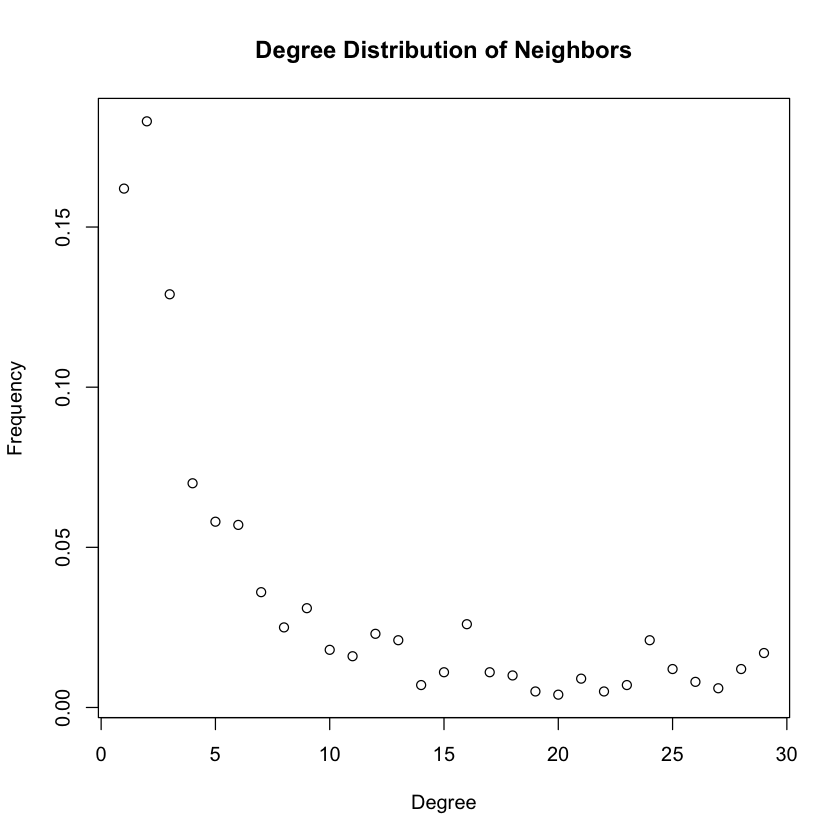

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"log" is not a graphical parameter”


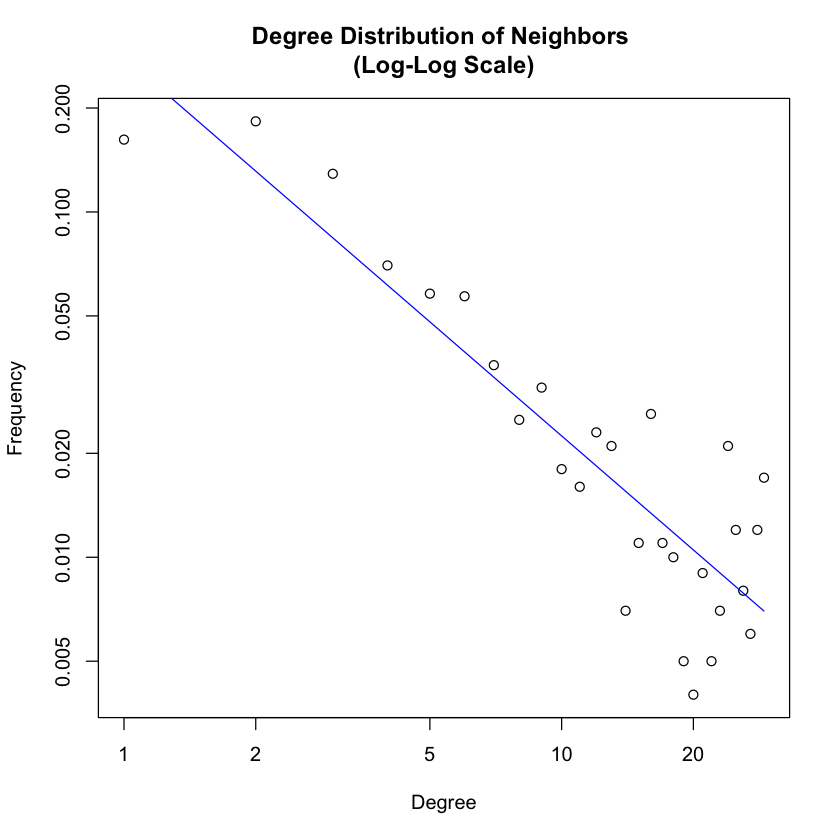

In [23]:
plot(degree_dist_new$deg_list_sorted, degree_dist_new$degree_distribution , 
     main="Degree Distribution of Neighbors",
     xlab="Degree",ylab="Frequency" )

plot(degree_dist_new$deg_list_sorted, degree_dist_new$degree_distribution , 
     main="Degree Distribution of Neighbors \n(Log-Log Scale)",
     xlab="Degree",ylab="Frequency" , log='xy')
    lines(seq(1, length(degree_dist_new$degree_distribution)), 
          exp(-1.270)*seq(1, length(degree_dist_new$degree_distribution))^(-1.097), 
          col="blue" , log='xy')

# abline(fit_dist)

### n=10k

In [28]:
n=10000

i <- sample(1:n, n, replace = FALSE)
deg_list_10k = c()
for( node in i ){
    degree_10k = get_neighbor_degree(g_pa_10k, node)
    deg_list_10k = c(deg_list_10k , degree_10k)
}


In [29]:
#sort the degree list
deg_list_sorted= sort(deg_list_10k)
#create a dataframe with the frequencey of each degree
degree_df = as.data.frame(table(deg_list_sorted))

#create new degree distribution dataframe
degree_dist_new_10k <- transform(degree_df, degree_distribution = Freq/n)
degree_dist_new_10k <- transform(degree_dist_new_10k, deg_list_sorted = as.numeric(deg_list_sorted))

lm(log(degree_distribution)~log(deg_list_sorted), degree_dist_new_10k)


Call:
lm(formula = log(degree_distribution) ~ log(deg_list_sorted), 
    data = degree_dist_new_10k)

Coefficients:
         (Intercept)  log(deg_list_sorted)  
             -0.7391               -1.4539  


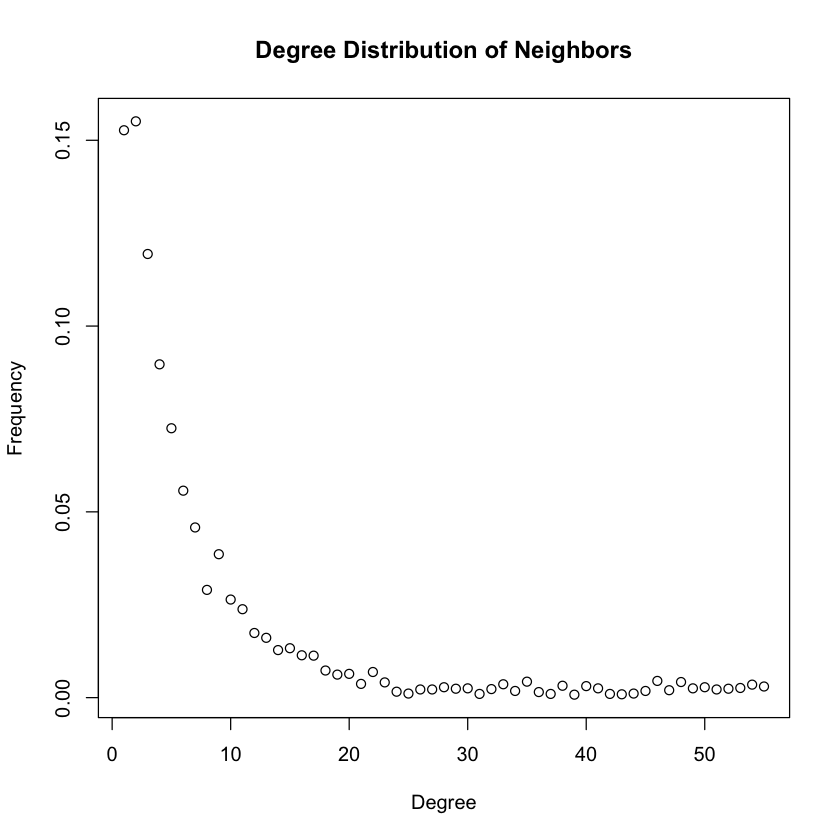

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"log" is not a graphical parameter”


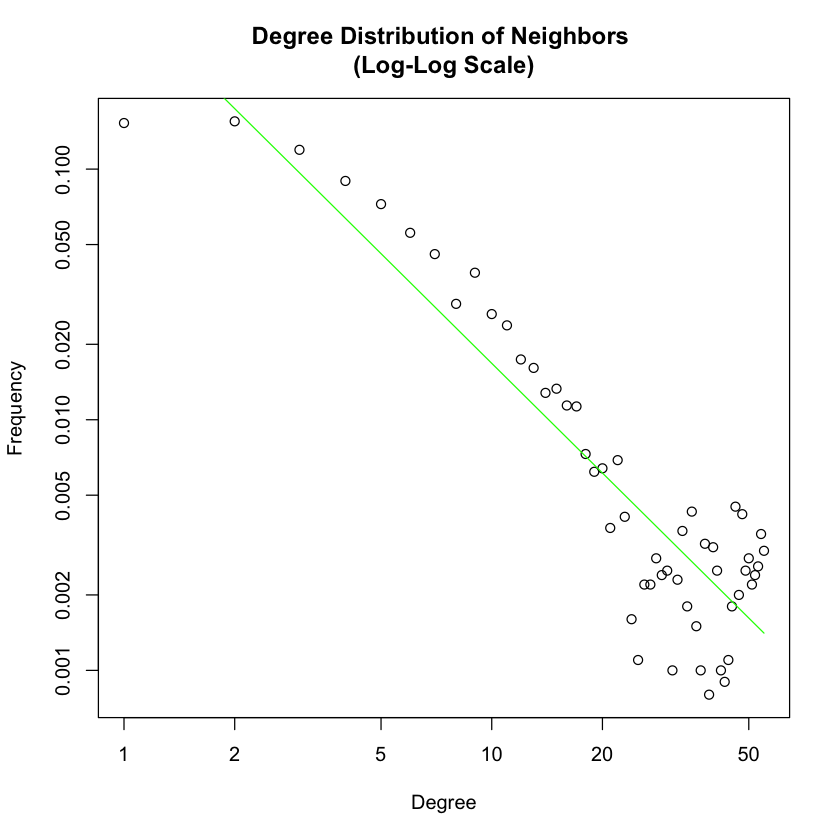

In [31]:
plot(degree_dist_new_10k$deg_list_sorted, degree_dist_new_10k$degree_distribution , 
     main="Degree Distribution of Neighbors",
     xlab="Degree",ylab="Frequency" )

plot(degree_dist_new_10k$deg_list_sorted, degree_dist_new_10k$degree_distribution , 
     main="Degree Distribution of Neighbors \n(Log-Log Scale)",
     xlab="Degree",ylab="Frequency" , log='xy')
    lines(seq(1, length(degree_dist_new_10k$degree_distribution)), exp(-0.7391)*seq(1, length(degree_dist_new_10k$degree_distribution))^(-1.4539), 
          col="green" , log='xy')


In [38]:

df_tst= degree_dist_new_10k[degree_dist_new_10k$deg_list_sorted>5,]
# df_nonzero_10k = degree_dist_df_10k[degree_dist_df_10k$freq>0,]

lm(log(degree_distribution)~log(deg_list_sorted), df_tst)


Call:
lm(formula = log(degree_distribution) ~ log(deg_list_sorted), 
    data = df_tst)

Coefficients:
         (Intercept)  log(deg_list_sorted)  
             -0.3254               -1.5789  


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"log" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"log" is not a graphical parameter”


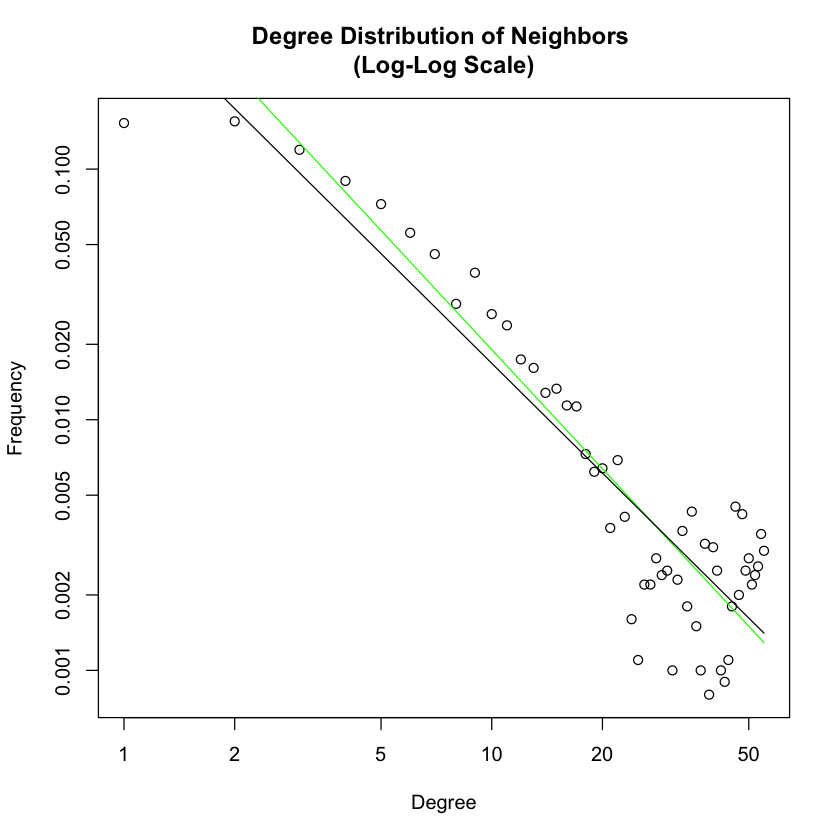

In [40]:
plot(degree_dist_new_10k$deg_list_sorted, degree_dist_new_10k$degree_distribution , 
     main="Degree Distribution of Neighbors \n(Log-Log Scale)",
     xlab="Degree",ylab="Frequency" , log='xy')
    lines(seq(1, length(degree_dist_new_10k$degree_distribution)), exp(-0.3254)*seq(1, length(degree_dist_new_10k$degree_distribution))^(-1.5789), 
          col="green" , log='xy')
lines(seq(1, length(degree_dist_new_10k$degree_distribution)), exp(-0.7391)*seq(1, length(degree_dist_new_10k$degree_distribution))^(-1.4539), 
          col="black" , log='xy')


# 1.2. f
    Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

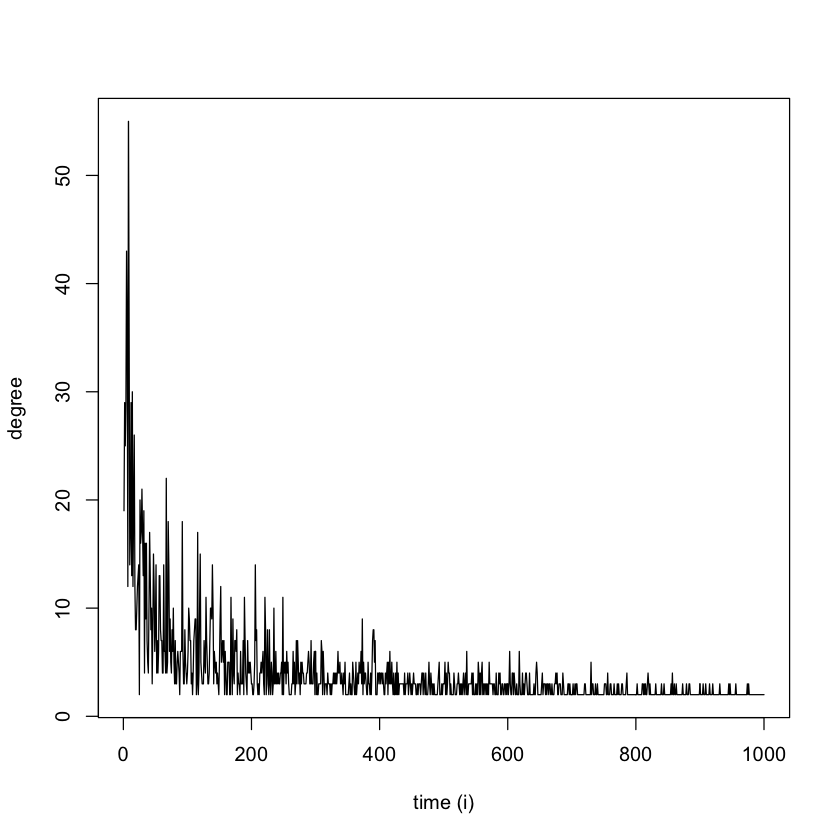

In [23]:
plot( degree(g_pa_1k), type="l", xlab="time (i)", ylab = "degree")

In [24]:
age_degree <- rev(degree(g_pa_1k))

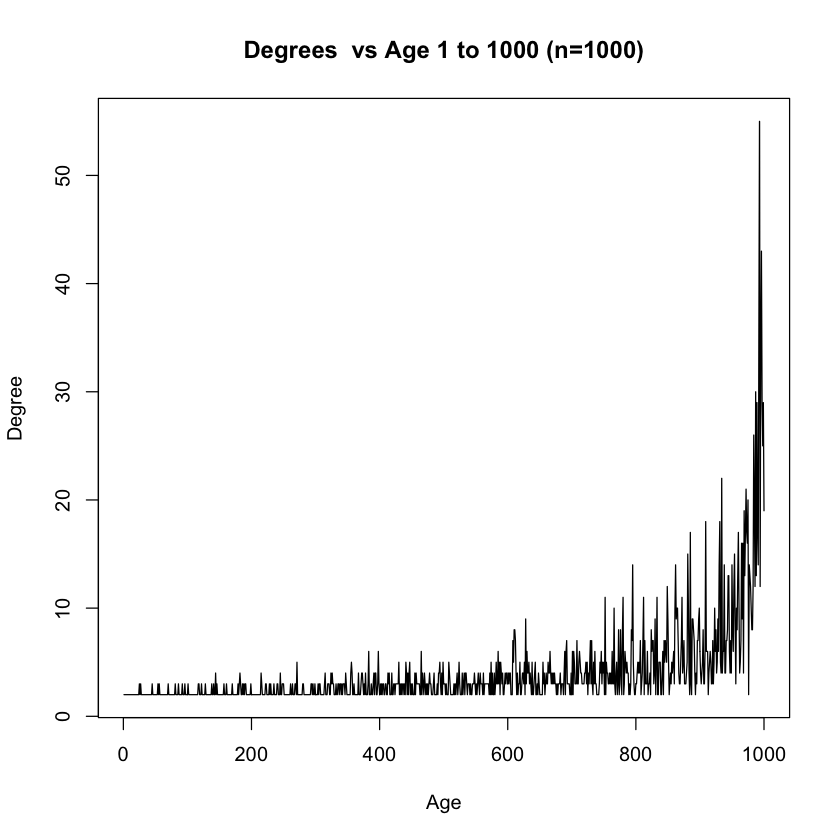

In [25]:
plot(age_degree,type='l',main="Degrees  vs Age 1 to 1000 (n=1000)",xlab="Age",ylab="Degree")

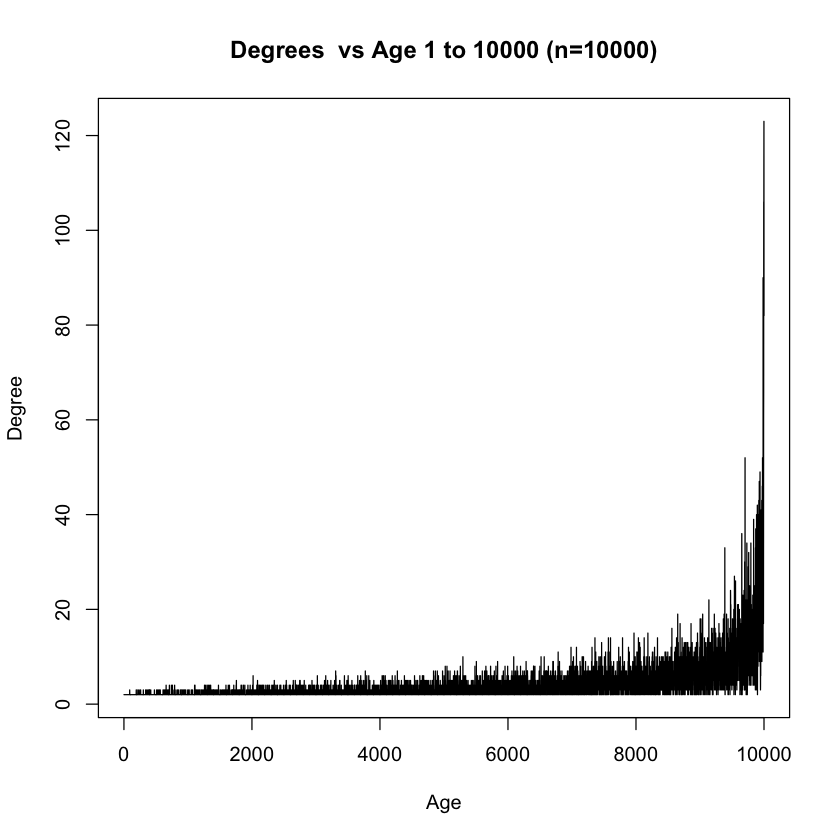

In [26]:
plot(rev(degree(g_pa_10k)),type='l',main="Degrees  vs Age 1 to 10000 (n=10000)",xlab="Age",ylab="Degree")